<a href="https://colab.research.google.com/github/FestusCJ/Data-Analytics-Projects/blob/master/ProsperLoanProject_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prosper Loan Data Exploration

## By Chukwuma John Festus

## Preliminary Wrangling
This data set contains 113,937 loans with 81 variables on each loan, including borrower rate (or interest rate), lender yield, loan status, borrower income, and many others. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.

The dataset can be downloaded [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv).
We will be exploring  some of these variables.

Key questions we will seek answers to inlcude:

* What affects the borrower’s rate or interest rate?
* Is there any other feature that is closely related and just as important as Borrower's rate?
* What is the optimum loan duration?

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
# load in the dataset into a pandas dataframe, print statistics
LoanData = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', 81) #we're using this command to display all columns since we have 81 variables

In [ ]:
# high-level overview of data shape and composition
print(LoanData.shape)
print(LoanData.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [ ]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [ ]:
LoanData.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [ ]:
LoanData.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,C,5.0,1,IL,Food Service Management,Employed,246.0,True,False,NaN,2013-04-14 05:54:58,700.0,719.0,1997-09-01 00:00:00,9.0,9.0,41.0,9,209.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,7714.0,0.80,1886.0,37.0,0.83,3.0,0.13,"$50,000-74,999",True,4333.333333,9BD7367919051593140DB62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,3647.4000,2238.38,1409.0200,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,A,8.0,7,PA,Professional,Employed,21.0,True,False,NaN,2011-11-03 20:42:53,700.0,719.0,1992-01-17 00:00:00,14.0,13.0,39.0,9,495.0,1.0,4.0,1.0,5062.0,4.0,0.0,0.0,15743.0,0.69,6658.0,39.0,0.92,0.0,0.11,"$75,000-99,999",True,8041.666667,62D93634569816897D5A276,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,NaN,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,D,3.0,1,TX,Other,Employed,84.0,True,False,NaN,2013-12-13 05:49:15,700.0,719.0,2002-02-25 00:00:00,12.0,12.0,25.0,9,521.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,"$25,000-49,999",True,2875.000000,DD1A370200396006300ACA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,C,5.0,2,GA,Food Service,Full-time,94.0,True,False,NaN,2011-11-14 13:18:24,680.0,699.0,1993-12-01 00:00:00,11.0,11.0,22.0,7,488.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,"$25,000-49,999",True,3875.000000,589536350469116027ED11B,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,NaN,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000

In [ ]:
LoanData.sample(20)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
74912,40E534214789733241E6E9B,329781,2008-05-09 22:53:05.563000000,C,36,Completed,2011-05-21 00:00:00,0.19906,0.1770,0.1670,NaN,NaN,NaN,NaN,NaN,NaN,1,GA,Pilot - Private/Commercial,Full-time,37.0,False,False,NaN,2008-05-09 22:25:06.733000000,660.0,679.0,1996-05-01 00:00:00,4.0,3.0,27.0,1,222.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8031.0,0.97,169.0,12.0,0.83,0.0,0.28,"$25,000-49,999",True,3083.333333,E0E63422369786581883C8B,1.0,14.0,13.0,1.0,0.0,8000.0,5255.83,-40.0,0,NaN,70,31492,7500,2008-05-21 00:00:00,Q2 2008,002B33814311723535519BD,264.91,9725.8300,7499.99,2225.8400,-125.75,0.00,0.00,0.00,0.0,1.0,2,1,51.36,187
1968,3A473592117200693572D89,985128,2013-10-15 21:22:31.267000000,NaN,60,Current,NaN,0.21576,0.1915,0.1815,0.16862,0.0799,0.08872,4.0,C,6.0,1,CA,Military Enlisted,Employed,180.0,False,False,NaN,2013-10-15 21:22:33,660.0,679.0,1999-10-25 00:00:00,4.0,2.0,14.0,1,255.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8424.0,0.00,0.0,14.0,0.92,0.0,0.21,"$50,000-74,999",True,5769.583333,22823696406882859415141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,107404,20000,2013-10-21 00:00:00,Q4 2013,7974369491186779704D78F,520.46,2071.3468,810.67,1260.6768,-66.38,0.00,0.00,0.00,0.0,1.0,0,0,0.00,1
83406,E65E34191389171897BCA88,309433,2008-04-13 10:48:48.937000000,D,36,Chargedoff,2009-03-23 00:00:00,0.27215,0.2500,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,7,CA,Other,Full-time,54.0,False,False,NaN,2008-04-13 10:48:01.953000000,600.0,619.0,2004-07-28 00:00:00,5.0,5.0,11.0,5,216.0,7.0,34.0,0.0,0.0,0.0,0.0,0.0,4110.0,0.91,289.0,9.0,1.00,1.0,0.54,"$1-24,999",True,1803.166667,8F2034194408696201B9DE3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1935,12.0,71,29890,2600,2008-04-21 00:00:00,Q2 2008,22093415298710372BAD245,103.38,605.2800,294.28,311.0000,-12.45,0.00,2305.72,2305.72,0.0,1.0,0,0,0.00,75
95854,FAA73542232385797502DE1,567092,2012-03-10 12:59:41.177000000,NaN,60,Current,NaN,0.29680,0.2705,0.2605,0.25400,0.0990,0.15500,3.0,D,6.0,16,IL,Computer Programmer,Employed,24.0,True,True,6A3B336601725506917317E,2012-03-10 12:59:38,620.0,639.0,1995-10-12 00:00:00,6.0,6.0,33.0,7,95.0,6.0,18.0,0.0,0.0,48.0,1.0,0.0,1010.0,0.03,24540.0,27.0,0.55,1.0,0.13,"$100,000+",True,10416.666667,CC743647294798996BF84FA,1.0,33.0,32.0,1.0,0.0,3000.0,0.00,88.0,0,NaN,24,62499,15000,2012-03-26 00:00:00,Q1 2012,C7F333682588299303C410F,458.48,10545.0400,3545.89,6999.1500,-258.73,0.00,0.00,0.00,0.0,1.0,0,0,0.00,26
28923,BE7E336729492359588CC04,33925

Observing the datasets we discover that:
* ListingCreationDate, ClosedDate, DateCreditPulled, FirstRecordedCreditLine and LoanOriginationDate are in object (string) format
* CreditGrade, Term, LoanStatus, ProsperRating(numeric), ProsperRating(Alpha), ProsperScore, ListingCategory(numeric), BorrowerState, Occupation, EmploymentStatus and IncomeRange are categorical variables.

We would convert the first item in this list to datetime format and convert the second item to categorical type. These variables may be further transformed at the time of plotting depending on how e perceive them.

In [ ]:
#For the date time variables, we first transform to a list and then change to the datetime format

DatetimeVariables = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']

LoanData[DatetimeVariables] = LoanData[DatetimeVariables].apply(pd.to_datetime)

#confirm conversion
LoanData[DatetimeVariables].dtypes

ListingCreationDate        datetime64[ns]
ClosedDate                 datetime64[ns]
DateCreditPulled           datetime64[ns]
FirstRecordedCreditLine    datetime64[ns]
LoanOriginationDate        datetime64[ns]
dtype: object

In [ ]:
# convert the second item into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['C', 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], 
                    'Term': [36, 60, 12],
                    'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
                                   'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
                                   'Past Due (61-90 days)', 'Past Due (31-60 days)',
                                   'Past Due (91-120 days)', 'FinalPaymentInProgress',
                                   'Past Due (>120 days)'],
                   'ProsperRating (numeric)': [ 6.,  3.,  5.,  2.,  4.,  7.,  1.],
                   'ProsperRating (Alpha)': ['A', 'D', 'B', 'E', 'C', 'AA', 'HR'],
                   'ProsperScore': [7.,  9.,  4., 10.,  2.,  8.,  5.,  3.,  6.,  1.], #Prosper score of 11 dropped
                   'ListingCategory (numeric)': [0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
                                                9, 17, 10, 12],
                   'BorrowerState': ['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ',
                                   'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
                                   'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
                                   'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
                                   'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
                   'Occupation': ['Other', 'Professional', 'Skilled Labor', 'Executive',
                                   'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
                                   'Waiter/Waitress', 'Construction', 'Computer Programmer',
                                   'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
                                   'Military Enlisted', 'Clerical', 'Teacher', 'Clergy',
                                   'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
                                   "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
                                   'Nurse (LPN)', 'Military Officer', 'Food Service Management',
                                   'Truck Driver', 'Administrative Assistant',
                                   'Police Officer/Correction Officer', 'Social Worker',
                                   'Tradesman - Mechanic', 'Medical Technician', 'Professor',
                                   'Postal Service', 'Civil Service', 'Pharmacist',
                                   'Tradesman - Electrician', 'Scientist', 'Dentist',
                                   'Engineer - Electrical', 'Architect', 'Landscaping',
                                   'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
                                   'Engineer - Chemical', 'Doctor', 'Chemist',
                                   'Student - College Senior', 'Principal', "Teacher's Aide",
                                   'Pilot - Private/Commercial', 'Religious', 'Homemaker',
                                   'Student - College Graduate Student', 'Student - Technical School',
                                   'Psychologist', 'Biologist', 'Student - College Sophomore',
                                   'Judge', 'Student - College Junior', 'Car Dealer',
                                   'Student - Community College', 'Student - College Freshman'],
                   'EmploymentStatus': ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
                                       'Not employed', 'Part-time', 'Retired'],
                   'IncomeRange': ['$25,000-49,999', '$50,000-74,999', '$100,000+',
                                   '$75,000-99,999', '$1-24,999', 'Not employed']} 
                                    # Not displayed and $O have been removed

# All NaN have not been used in the groupings

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    LoanData[var] = LoanData[var].astype(ordered_var)

In [ ]:
LoanData.describe()

,ListingNumber,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,26.000000,660.000000,679.000000,7.000000,6.000000,17.000000,4.00000,114.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.121000e+03,0.310000,880.000000,15.000000,0.8

In [ ]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   category      
 4   Term                                 113937 non-null  category      
 5   LoanStatus                           113937 non-null  category      
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

### What is the structure of your dataset?

There are 113937 diamonds in the dataset with 81 features. There is a good mix of numeric and categorical varaibales.

### What is/are the main feature(s) of interest in your dataset?

We're interested in figuring out what features are best for predicting the Borrower's rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Wexpect that Term, BorrowerAPR, LenderYield, EstimatedLoss, EstimatedReturn, ProsperRating, ProsperScore, ListingCategory, BorowerState, Ocupation, mploymentStatus, IncomeRange etc will have effects on the Borrower's rate.

## Univariate Exploration

We'll start by looking at categorical variables, after which we will explore continuous variables.

Since we will be plotting bar plots and histogram multiple times, let's define a functions we'll use for these plots in our analysis.

In [ ]:
def CountPlot(LoanData, column):
    '''Function that uses seaborn's countplot function 
    to plot visualizations in the categorical univariate exploartion.
    '''
    
    fig, ax = plt.subplots(figsize = [8,8])
    status_order = LoanData[column].value_counts().index
    default_color = sb.color_palette()[0]
    sb.countplot(data = LoanData, x = column, color = default_color, order = status_order)
    plt.xticks(rotation = 30)
    plt.title(f"Countplot showing Distribution of the feature: {column}")

    plt.show()
    

In [ ]:
def Histogram(LoanData, column):
    '''Function that uses matplotlib's histogram function 
    to plot visualizations in the continuous univariate exploration.  
    '''
    plt.figure(figsize = [8,8])
    
    bins = np.arange(0, LoanData[column].max()+ 0.01, 0.01)
    plt.hist(data = LoanData, x = column, bins = bins)

    plt.xlim(0,0.52)
    
    plt.xlabel(f"{column}")
    plt.title(f"Hsitogram showing Distribution of the feature: {column}");

#### We will divide our Univariate analysis into Categorical and Continuous plots for which we will use count/bar plots and histograms respectively

### Categorical Variables

### 1. Loan Status

The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

This is the main feature of our dataset. What is the distribution of this feature like?. For this we will use the countplot.

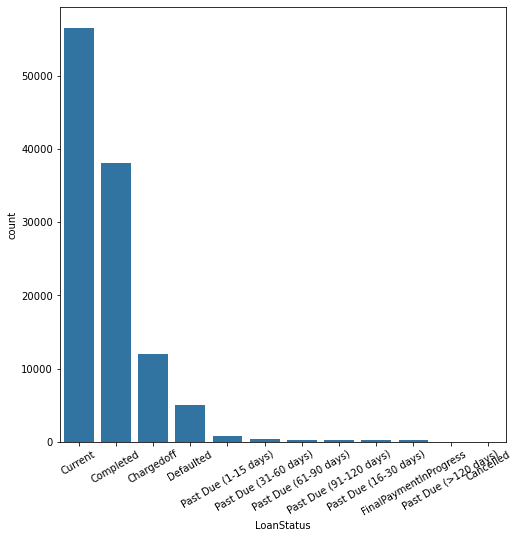

In [ ]:
fig, ax = plt.subplots(figsize = [8,8])
status_order = LoanData['LoanStatus'].value_counts().index
default_color = sb.color_palette()[0]
sb.countplot(data = LoanData, x = 'LoanStatus', color = default_color, order = status_order)
plt.xticks(rotation = 30)

plt.show()

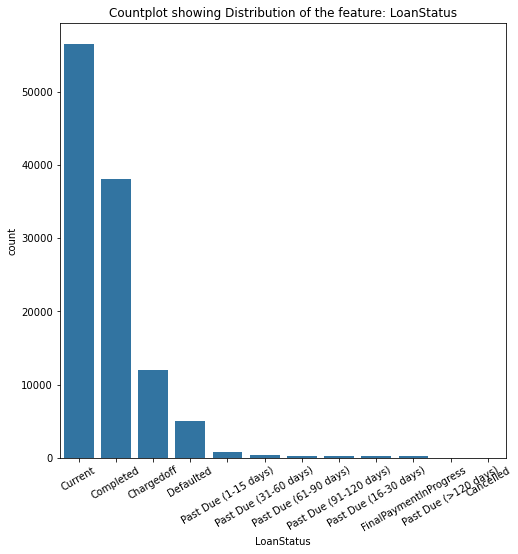

In [ ]:
CountPlot(LoanData, 'LoanStatus');

The plot above is not convincing. Let's investigate the data further and see which transformation can be performed to gain better insights

In [ ]:
LoanData['LoanStatus'].sample(10)

69059      Current
27188    Completed
14910      Current
17865      Current
20256    Completed
92066      Current
12119      Current
333        Current
38343      Current
72068    Completed
Name: LoanStatus, dtype: category
Categories (12, object): ['Completed' < 'Current' < 'Past Due (1-15 days)' < 'Defaulted' ... 'Past Due (31-60 days)' < 'Past Due (91-120 days)' < 'FinalPaymentInProgress' < 'Past Due (>120 days)']

From the command above we see LoanStatus has 12 categories. Let's group all the pastdue into one bucket and replot this variable.

In [ ]:
LoanData['LoanStatus'] = LoanData['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (16-30 days)',
                                                        'Past Due (61-90 days)', 'Past Due (31-60 days)',
                                                        'Past Due (91-120 days)','Past Due (>120 days)'],
                                                        'Past Due')

LoanData['LoanStatus'].dropna(inplace = True)

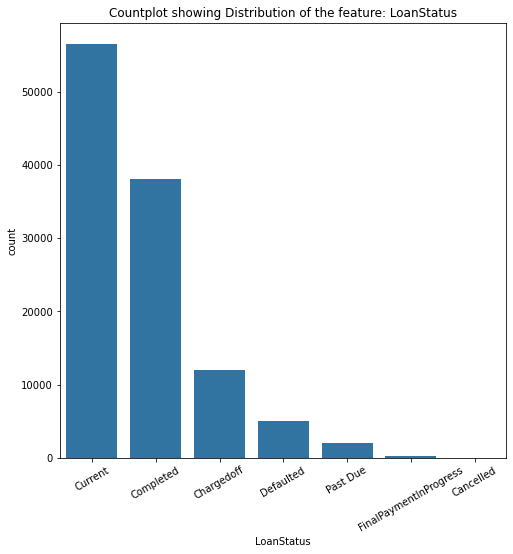

In [ ]:
CountPlot(LoanData, 'LoanStatus');

After transformation we can see that current loans make up the vast majority of loans while cancelled loans are the least.

### 2. Term
The length of the loan expressed in months.

What is the trend of this variable like?


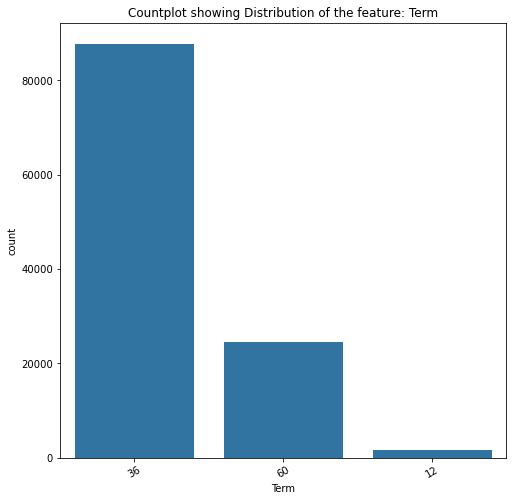

In [ ]:
CountPlot(LoanData, 'Term');

We can see that a 36-month Term has the most borrowers. This is followed by a 60-month term and a 12-month term has the least borrowers.

### 3. Credit Grade
The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

What does the distribution of this variable look like?.

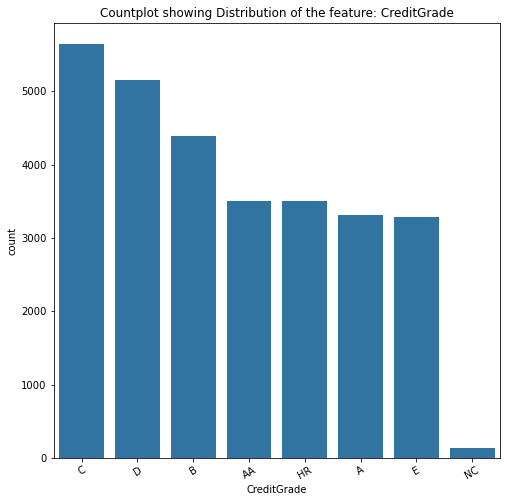

In [ ]:
CountPlot(LoanData, 'CreditGrade');

We can see that at the time of listing, most borrowers had a credit rating of 'C' which was followed by 'D' and 'B'. 'AA' and 'HR' had similar credit ratings and the least distributed rating was 'NC'.

### 4. ProsperRating (numeric)

The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

How is this variable distributed?

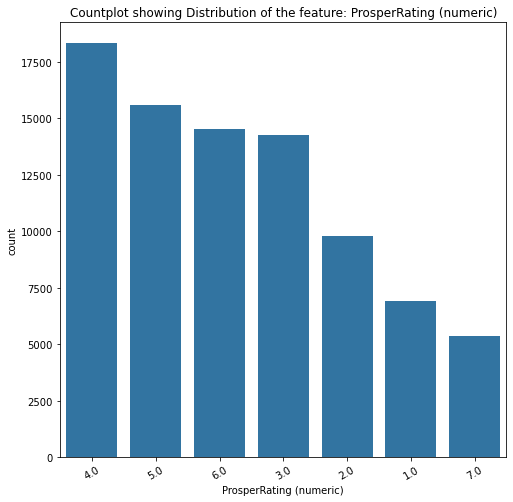

In [ ]:
CountPlot(LoanData, 'ProsperRating (numeric)');

This shows prosper rating for most loans had a 4.0 and rating for the least loans was a 7.0

### 5. ProsperRating (Alpha)

The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

How is this variable distributed?

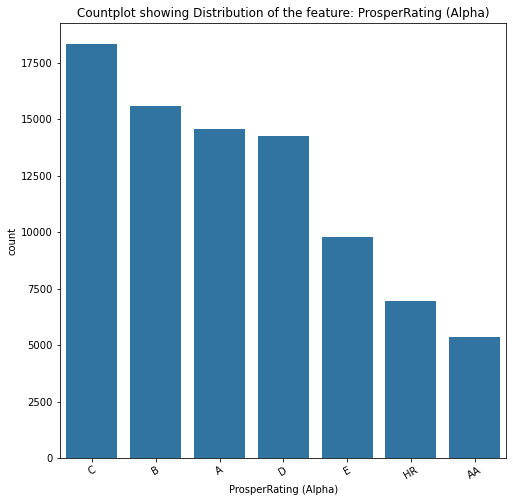

In [ ]:
CountPlot(LoanData, 'ProsperRating (Alpha)');

Similar to the Propser rating numeric, we can confirm the distribution of ratings was in the order  4 - C > 5 - B > 6 - A > 3 - D >  2 - E > 1 - HR > 7 - AA.

### 6. Prosper Score
A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

How is the Prosper Score distributed?

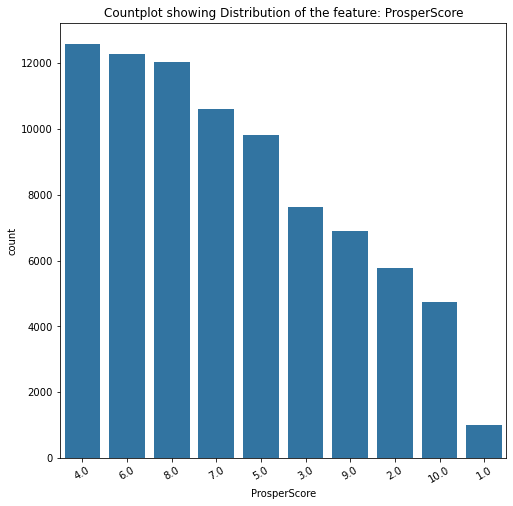

In [ ]:
CountPlot(LoanData, 'ProsperScore');

From our plot we can see most borrowers had a risk score of 4 showing there was an element of risk among many borrowers. 1 had the least scores which was expected as this was the riskiest category. A prosper score of 10 was was the least riskiest categeory. Surprsingly, the category that had the second least count.

### 7. Listing Category
The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

What does the distribution of Listing Category look like?

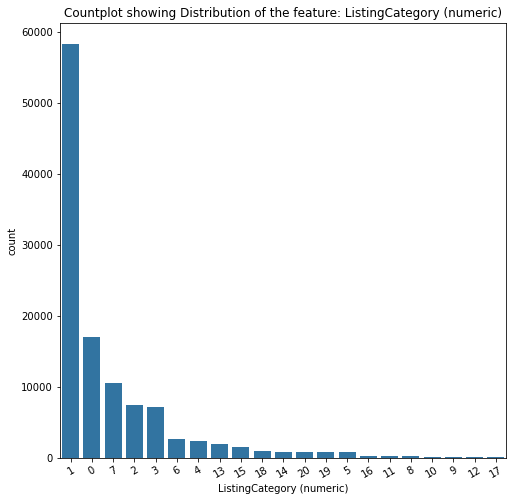

In [ ]:
CountPlot(LoanData, 'ListingCategory (numeric)');

We can see most borrowers at the time of listing selected the category 1 - Debt Consolidation while 17 - RV was selected the least.

### 8. Borrower State
The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

At the time of listing, where did most borrowers live?

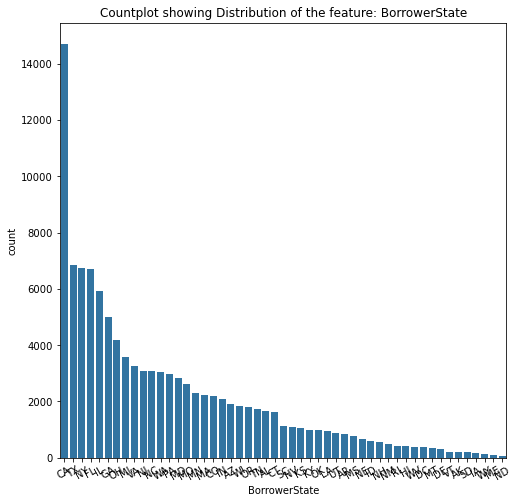

In [ ]:
CountPlot(LoanData, 'BorrowerState');

Because of the number of categories in this feature, it was not so visible from our function, the distribution of states. Let's now use an adjusted similar plot to view this distribution.

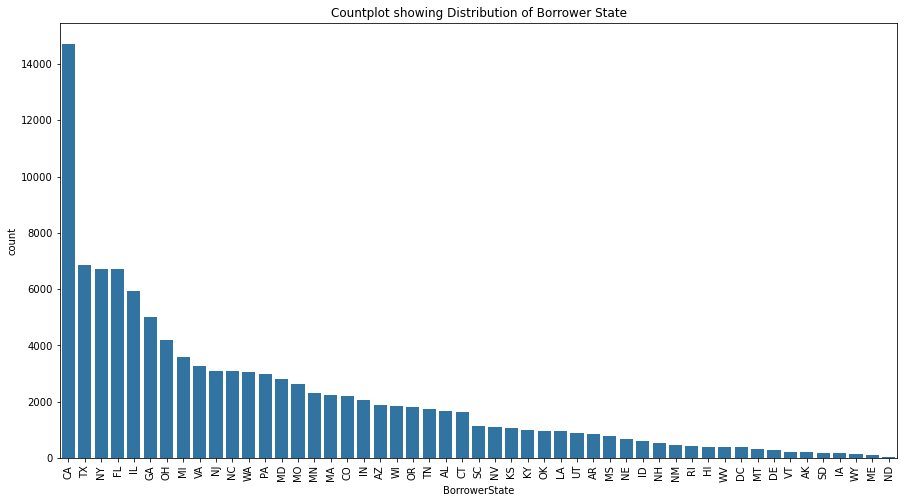

In [ ]:
fig, ax = plt.subplots(figsize = [15,8])
status_order = LoanData['BorrowerState'].value_counts().index
default_color = sb.color_palette()[0]
sb.countplot(data = LoanData, x = 'BorrowerState', color = default_color, order = status_order)
plt.xticks(rotation = 90)
plt.title('Countplot showing Distribution of Borrower State')

plt.show()

We can now see that at the time the listing was created, most borrowers lived in California. This was followed by Texas, NewYork, Florida and Illinois while the state where the least number of borrowers lived was in North Dakota.

### 9. Occupation
The Occupation selected by the Borrower at the time they created the listing.

Which Occupation were most borrowers associated with?

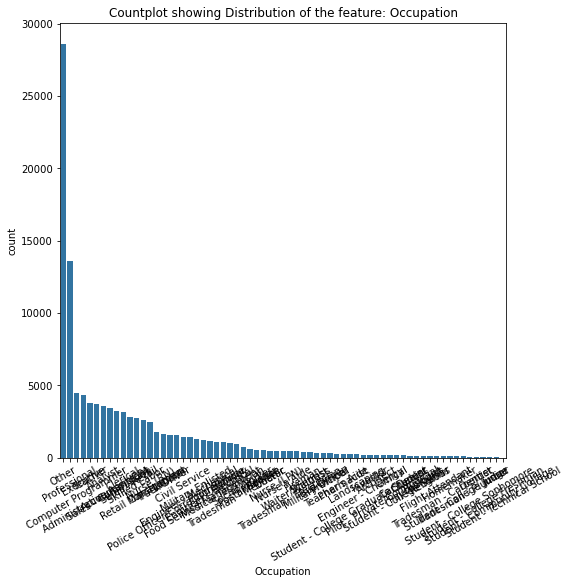

In [ ]:
CountPlot(LoanData, 'Occupation');

Just like the Borrower State, we have a similar challenge with our function. We will also adjust our plot.



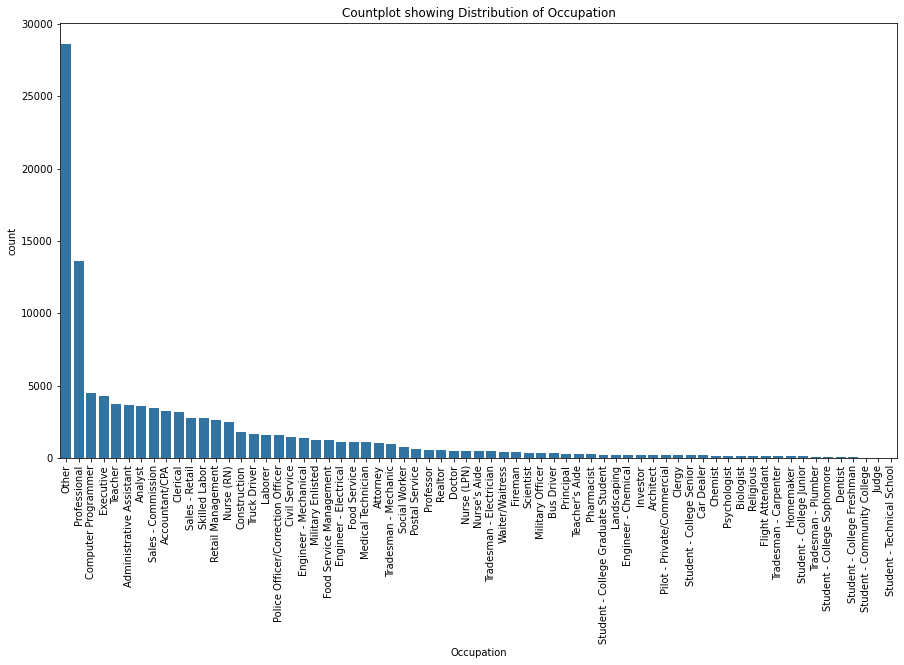

In [ ]:
fig, ax = plt.subplots(figsize = [15,8])
status_order = LoanData['Occupation'].value_counts().index
default_color = sb.color_palette()[0]
sb.countplot(data = LoanData, x = 'Occupation', color = default_color, order = status_order)
plt.xticks(rotation = 90)
plt.title('Countplot showing Distribution of Occupation')

plt.show()

Since Other and Professional are not really defined, we can say most Borrower's were computer programmers while the least borrowers were technical school students.

### 10. Is Borrower Home Owner
A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. This feature is a boolean type categorical variable.

How does the distribution of Home Owners look?

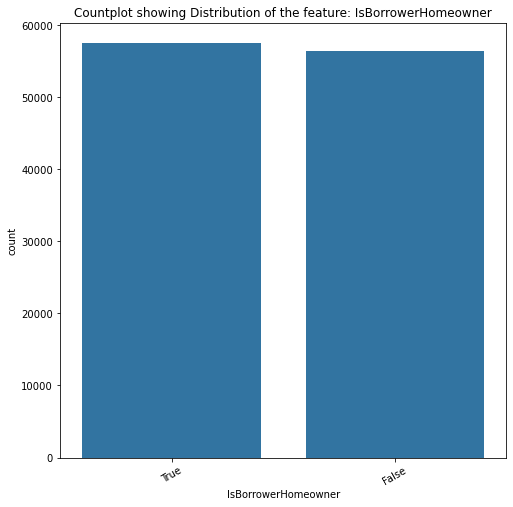

In [ ]:
CountPlot(LoanData, 'IsBorrowerHomeowner');

We can see the distribution of Home Owners and Non Home Owners as borrowers was fairly similar with Home Owners slightly edging it.

### 11. Employment Status
The employment status of the borrower at the time they posted the listing.

What is the employment status of borrowers?

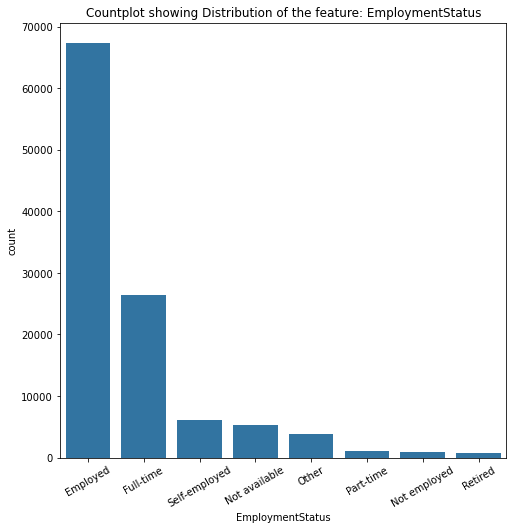

In [ ]:
CountPlot(LoanData, 'EmploymentStatus');

We can see most borrowers were employed and the least borrowers were retired.

We can go further to group full-time, self-employed, and part-time as employed and take away others and not available to get better insights.

In [ ]:
LoanData['EmploymentStatus'] = LoanData['EmploymentStatus'].replace(['Employed', 'Full-time', 'Self-employed',
                            'Part-time'],'Employed').replace('Not available',np.nan).replace('Other',np.nan)

LoanData['EmploymentStatus'].dropna(inplace = True)

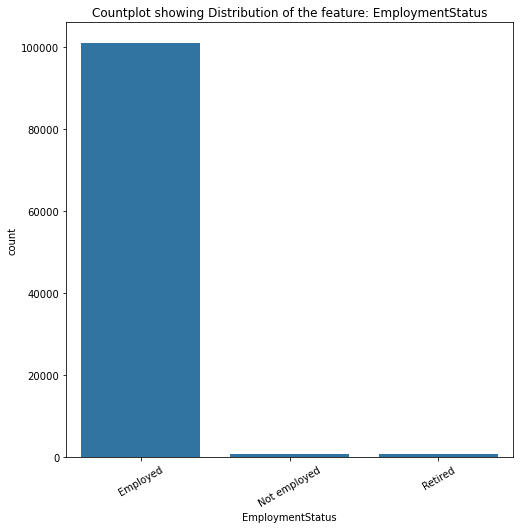

In [ ]:
CountPlot(LoanData, 'EmploymentStatus');

We can even see that category of employment is gangantuan and dwarfs other categories such as not employed and retired which are pretty similar. We can say safely say most borrowers are employed.

### 12. Income Range
The income range of the borrower at the time the listing was created.

What is the income range of borrowers?

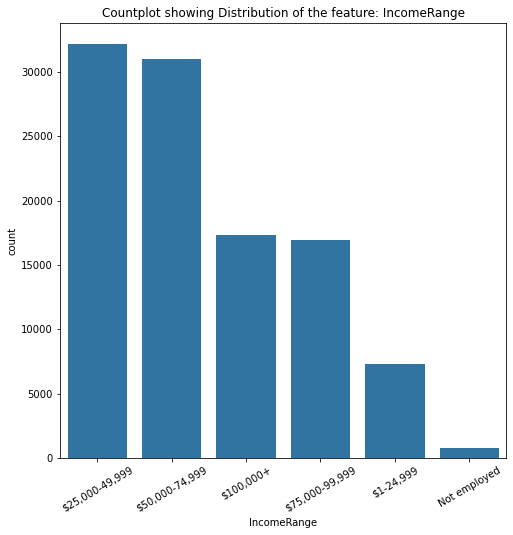

In [ ]:
CountPlot(LoanData, 'IncomeRange');

We can see most borrowers were in the income range of $(25,000 - 49,000) while the least borrowers were not employed - this is understandable because most credit institutions will not want to give loans to peole who were not employed.

### 13. Income Verifiable
The borrower indicated they have the required documentation to support their income. This feature is of the boolean type categorical variable.

How many borrowers have their income verified?

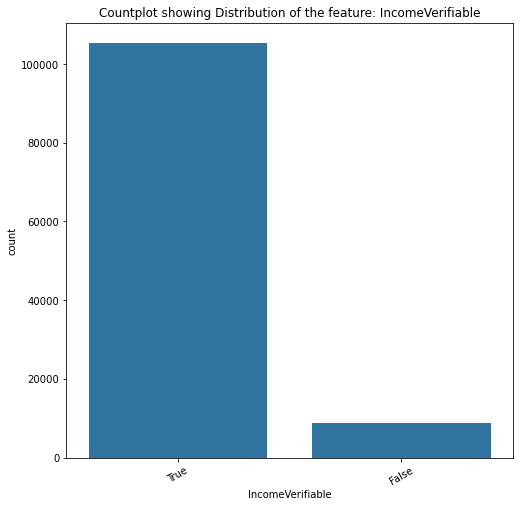

In [ ]:
CountPlot(LoanData, 'IncomeVerifiable');

We can see that the bulk of borrowers have their income verified.

###  Continuous Variables

### 14. Borrower APR

The Borrower's Annual Percentage Rate (APR) for the loan.

What does this distribution look like?

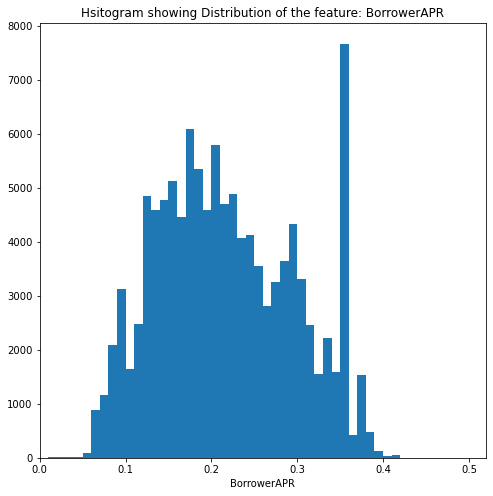

In [ ]:
Histogram (LoanData, 'BorrowerAPR');

The histogram of Borrower APR shows most of the peaks are distributed in the range just before 0.1 to just after 0.4. The highest peak between 0.3 and 0.4.

### 15. Borrower Rate
The Borrower's interest rate for this loan. 

How does the distribution of Borrower Rate look?

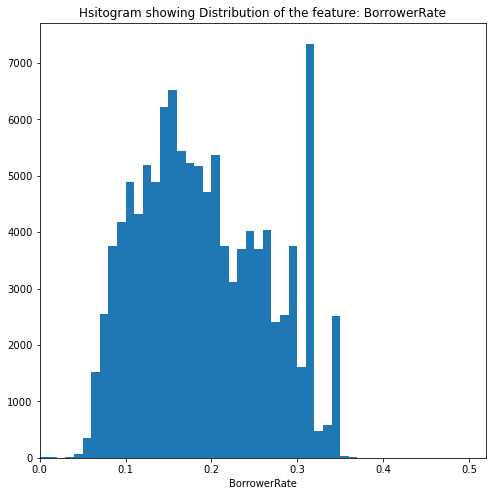

In [ ]:
Histogram (LoanData, 'BorrowerRate');

The borrower rate has a distribution which begins at 0 and ends just before 0.4. Similar to Borrower APR, the highest peak is between 0.3 and 0.4.

### 16. Lender Yield
The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

How is the Lender Yield feature distributed?

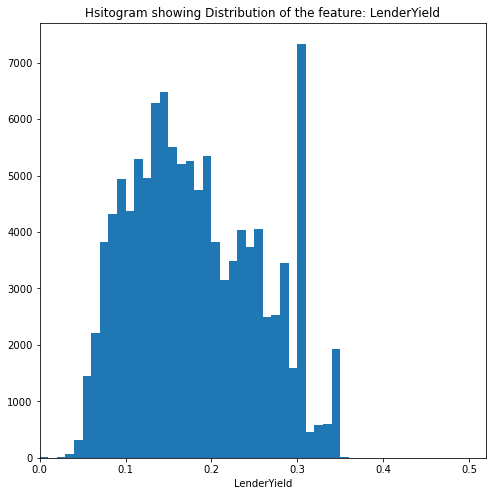

In [ ]:
Histogram (LoanData, 'LenderYield');

The Lender yield has is skewed to the left. It's highest peak is at 0.3. It begins at 0 and ends at around 0.35.

### 17. Estimated Loss
Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

How is the Estimated Loss feature distributed?

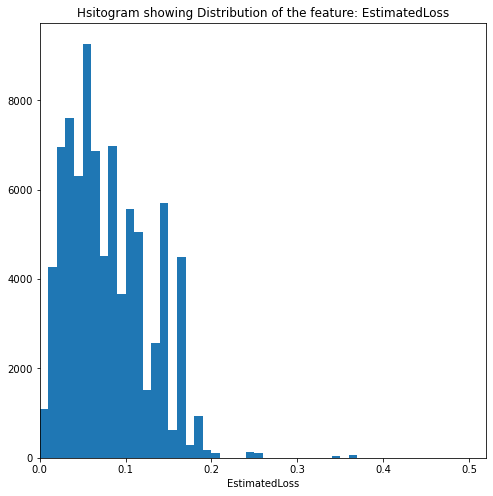

In [ ]:
Histogram (LoanData, 'EstimatedLoss');

The estimated loss is skewed to the right with the highest peak at around 0.8.

### 18. Estimated Return
The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

How is the Estimated Return feature distibuted?

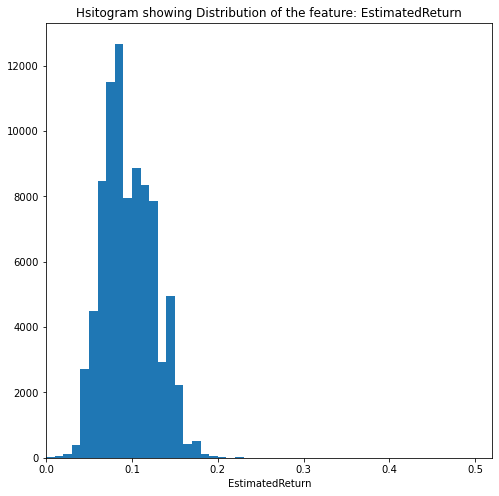

In [ ]:
Histogram (LoanData, 'EstimatedReturn');

The Estimated return is skewed to the right and its highest peak occurs at 0.9.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The loan status variable had 12 categories with many of the categories as past due. So we transformed the data by having all past due as one group.. Under the transformation, current loans had the most counts while cancelled loans had the least.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
For all of the data, the missing values (NAN) were removed. In Prosper score we removed 11 since it was not part of the definitions. In Employment status, we recategorized the data to include other data under employed since in our view, they were still a form of employment and then we removed other. In income range we removed not displayed and $0. We performed these operations in order to gain better insights from our dataset.

### Bivariate Exploration
To start off with, we want to look at the pairwise correlations present between features in the data.

In [ ]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedLoss', 'EstimatedReturn']

#Although we had 13 categorical plots in our univariate exploration, we'll use only 4 plots here.
categoric_vars = ['Term', 'ProsperScore', 'IncomeRange']

### 19. Correlation Heat Map for Selected Continuos Variables

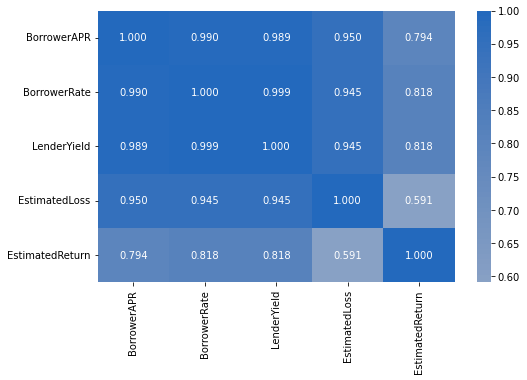

In [ ]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(LoanData[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### 20. Plot Matrix for Continuous Variables

LoanData.shape= (113937, 81)
LoanData_samp.shape= (500, 81)


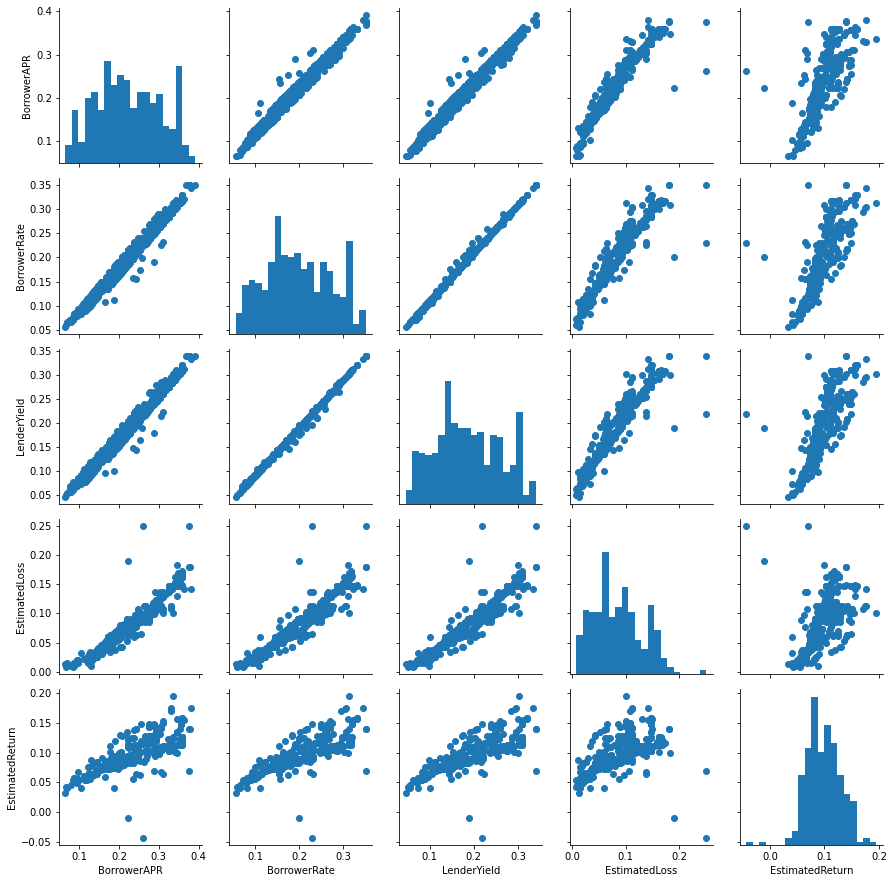

In [ ]:
# plot matrix: sample 500 loans from the dataset so that plots are clearer and they render faster
print('LoanData.shape=',LoanData.shape)
LoanData_samp = LoanData.sample(n=500, replace = False)
print('LoanData_samp.shape=',LoanData_samp.shape)

g = sb.PairGrid(data = LoanData_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

From the plots, we can see strongest correlation among Borrower APR, Borrower Rate and Lender Yield. This is expected as these features deal with various calculations perfomed before loans can be approved. 

Furthermore, there are good correlations between Estimated Loss and Borrower APR, Borrower Rate and Lender Yield. Estimated Return also show good correlations with Borrower APR, Borrower Rate and Lender Yield although is is not as much as those of Estimated Loss. The correlation between Estimated Return and Estimated Loss is just above average.

Since BorrowerRate and Lender Yield had the strongest correlations of all numeric features, we will be exploring this further.

### 21. Box Plots for Continuous and Categorial Variables

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Figure size 720x720 with 0 Axes>

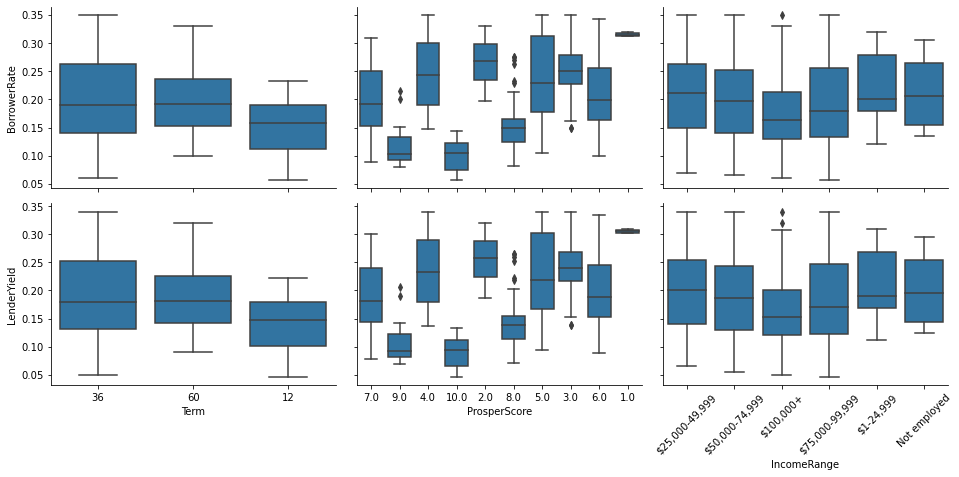

In [ ]:
# plot matrix of numeric features against categorical features.

# Deprecated
# samples = np.random.choice(LoanData.shape[0], 500, replace = False)
# LoanData_samp = LoanData.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = LoanData_samp, y_vars = ['BorrowerRate', 'LenderYield'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=45)
plt.show();

From our plots, we can see that BorrowerRate and LenderYield have negative relationships with Term which decreases from 36 to 60 to 12. ProsperScore and IncomeRange do not have clearly defined realtionships with BorrowerRate and LenderYield.

Finally, let's look at relationships between the three categorical features we selected.

### 22 Count Plots for Categorical Variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


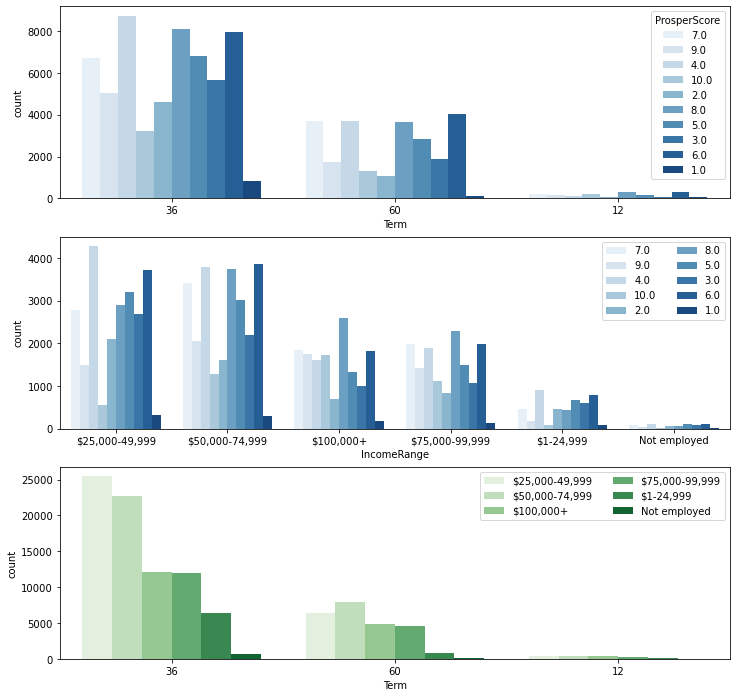

In [ ]:
plt.figure(figsize = [12, 12])

# subplot 1: Term vs. ProsperScore
plt.subplot(3, 1, 1)
sb.countplot(data = LoanData, x = 'Term', hue = 'ProsperScore', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to remove overlapping

# subplot 2: IncomeRange vs. ProsperScore
ax = plt.subplot(3, 1, 2)
sb.countplot(data = LoanData, x = 'IncomeRange', hue = 'ProsperScore', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: Term vs. IncomeRange, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = LoanData, x = 'Term', hue = 'IncomeRange', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

We can see interactions between term and prosper score. 36-month term have higher prosper scores followed by 60-month term. 12-month term are almost invisible. Similarly we see interactions between income range and prosper score with 25,000 - 49,999 having the highest scores followed by 50,000 - 74,999. Not employed have the least prosperscores. Finally we see the same trend in term vs income range. 36-month term have more pronounced income ranges than 60-month term. 12-month term income ranges are nearly non-existent.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We saw LendingYield and BorrowerRate had an approximately linear relationship and had the highest correlation compared to other numeric features such as EstimatedLoss and EstimatedReturn. LendingYield and BorrowerRate showed some realtionship with Term. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
There were interesting relationships among Term, ProsperScore and IncomeRange. 

### Multivariate Exploration
The main thing we want to explore in this part of the analysis is how the three categorical measures we selected relate amongst each other and how the top three most correlated numeric features display in a multivariate analysis. 

### 23. Line Plots for Categorical Variables

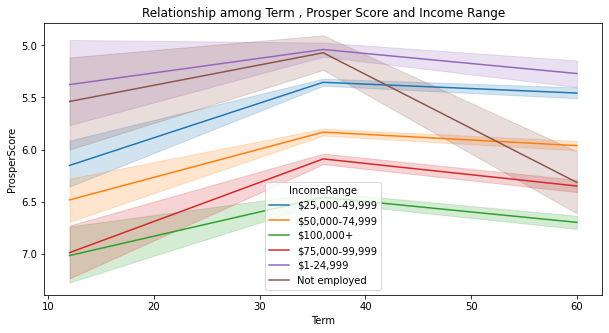

In [ ]:
plt.figure(figsize=(10,5));
sb.lineplot(data = LoanData, x = 'Term', y = 'ProsperScore', hue = 'IncomeRange');
plt.title('Relationship among Term , Prosper Score and Income Range');

We can see from the plot above that the highest peak was observed at a prosper score of 5, Term of 30 month and income range of 1-24,999$.

### 24. Scatter Plots for Continuous Variables

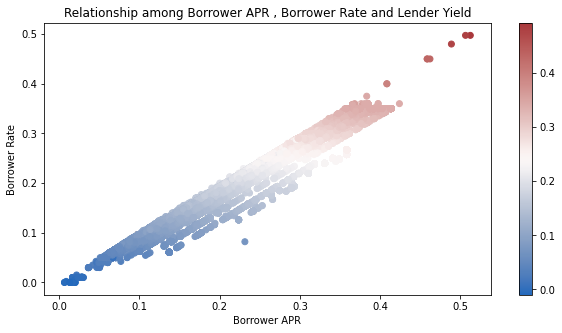

In [ ]:
# plot of Borrower APR, Borrower Rate and Lender Yield.
plt.figure(figsize = [10, 5])
plt.scatter(data = LoanData, x = 'BorrowerAPR', y = 'BorrowerRate', c = 'LenderYield', cmap = 'vlag', 
            vmin = LoanData['LenderYield'].min(), vmax = LoanData['LenderYield'].max())
plt.xlabel('Borrower APR')
plt.ylabel('Borrower Rate')
plt.title('Relationship among Borrower APR , Borrower Rate and Lender Yield')
plt.colorbar();

We can see there is a strong correlation among the three features - Borrower APR, Borrower Rate and Lender Yield.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Strong relationships between LenderYield, Borrower Rate and Borrower APR were confirmed.

### Were there any interesting or surprising interactions between features?
The trend for Prosper Score, Term and Income Range showed interesting peak points. 

## Conclusion

There were 81 features in this dataset and we explored a few of these features which was not exhasutive. However from our analysis we deduced that:

* Borrower Rate had the strongest correlated with Lender Yield
* Borrower APR which had a high relationship with Borrower Rate also had a good correlation with Lender Yield
* Most loans were for a term of 30 months.